In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']]
y = df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model_A = DecisionTreeClassifier(max_depth = 2)

In [ ]:
model_A.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

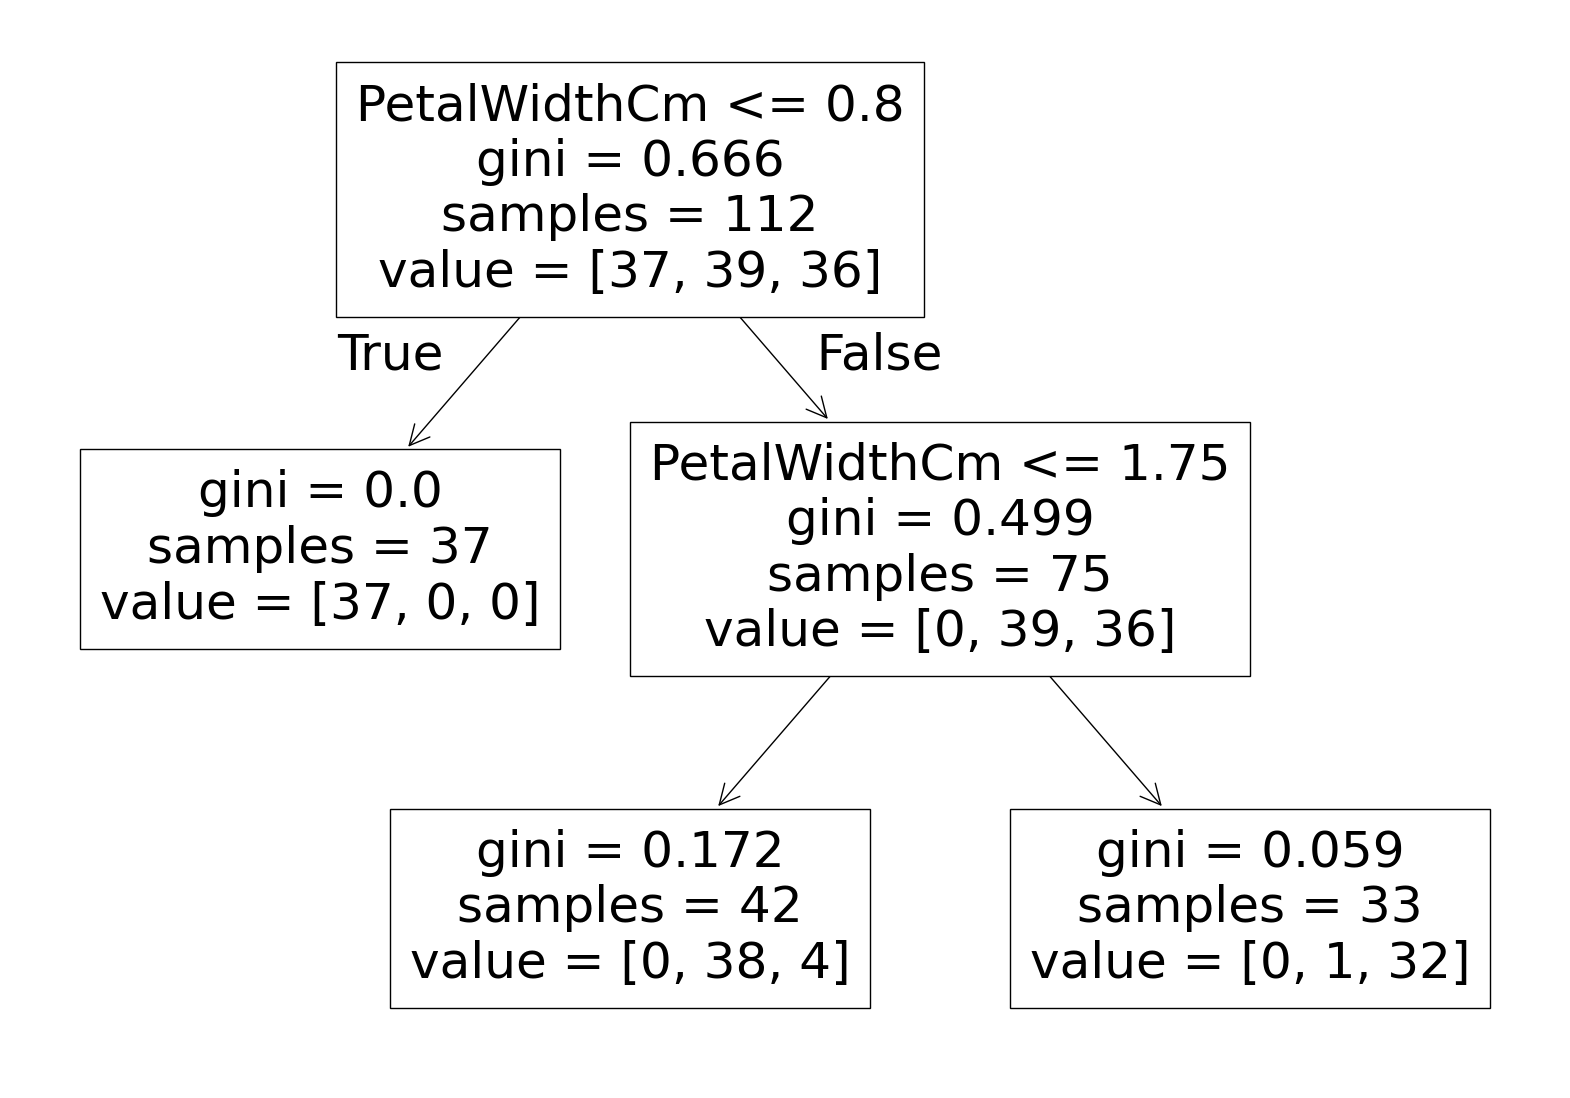

In [ ]:
plt.figure(figsize = (20,14))
plot_tree(model_A, feature_names = xtrain.columns)
plt.show()

In [ ]:
print(model_A.score(xtrain,ytrain))

0.9553571428571429


In [ ]:
print(model_A.score(xtest,ytest))

0.9736842105263158


**Decision tree classifier on Wine data**

In [ ]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/wine.csv')
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
X = df_wine.drop(columns = ['Target'])
y = df_wine['Target']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

from sklearn.tree import DecisionTreeClassifier

model_B = DecisionTreeClassifier()

model_B.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
print(model_B.score(xtrain,ytrain))

1.0


In [ ]:
print(model_B.score(xtest,ytest))

0.9111111111111111


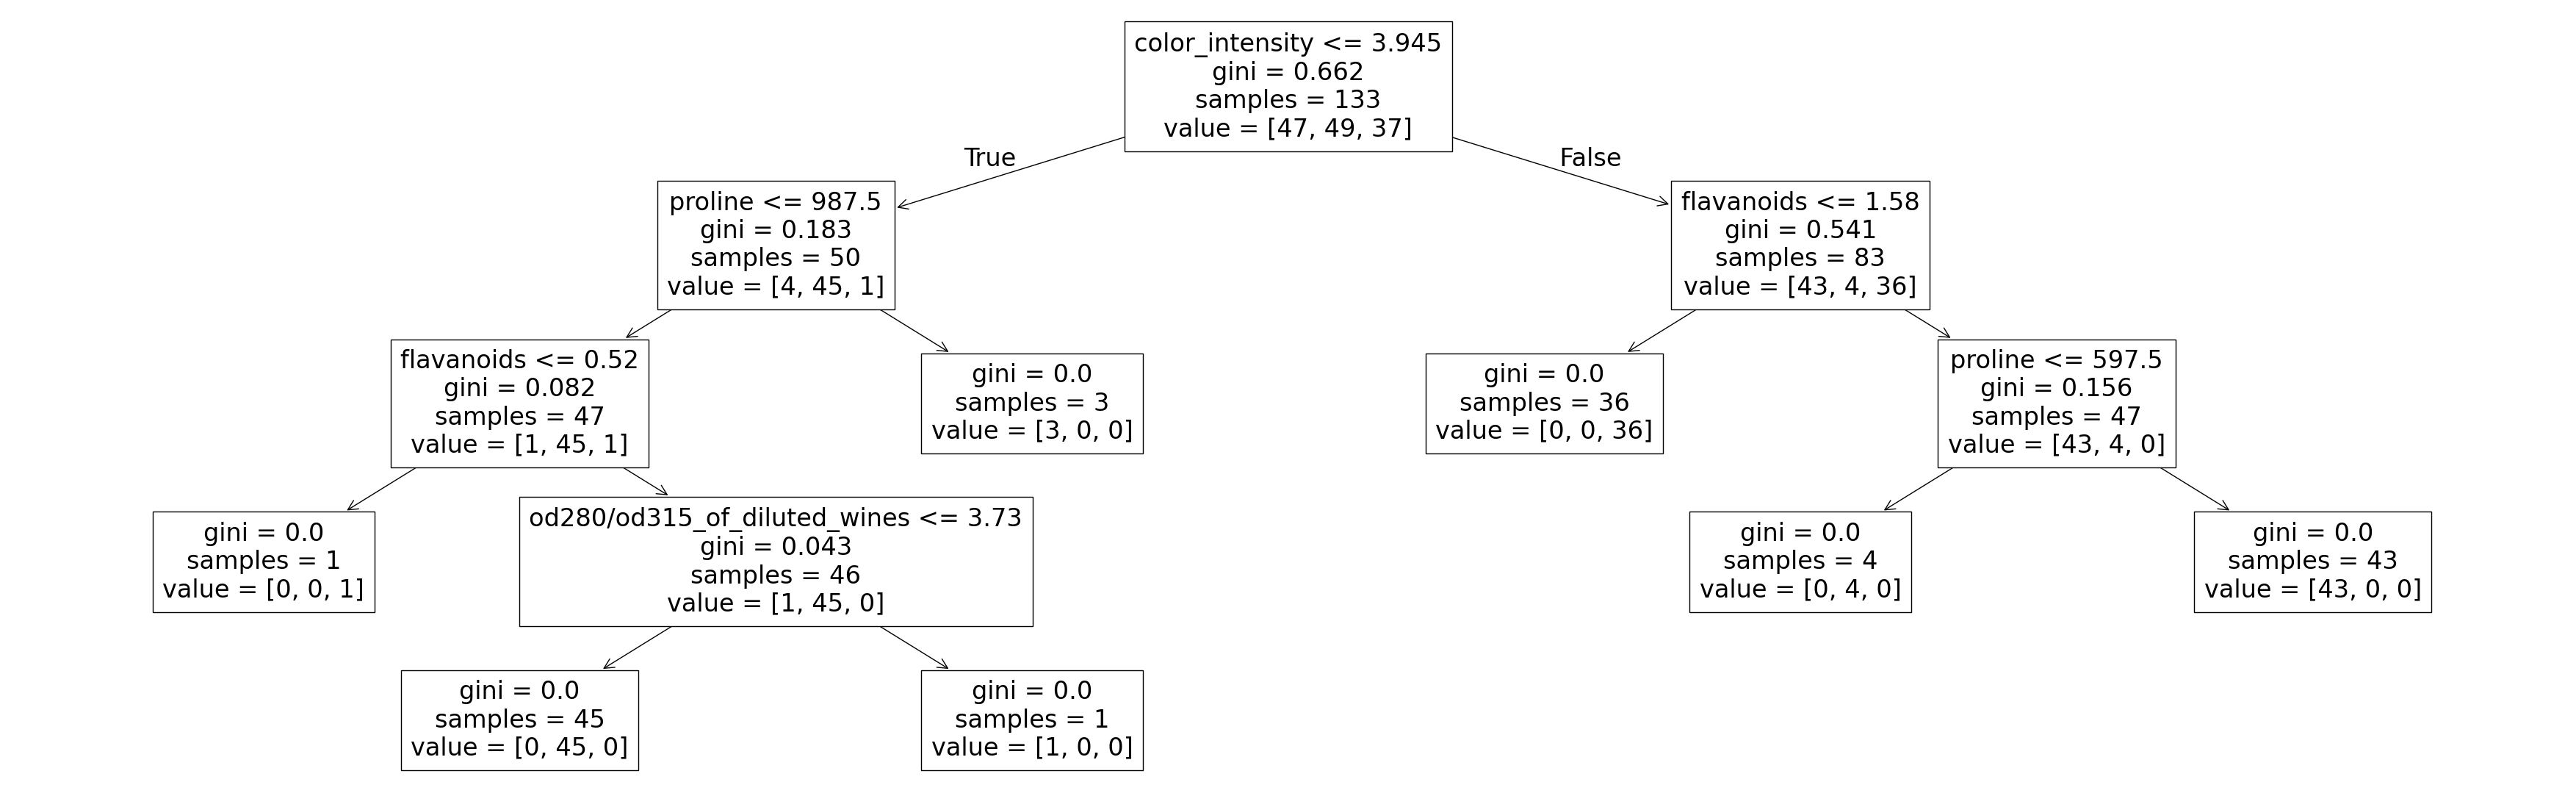

In [ ]:
plt.figure(figsize = (45,14))
plot_tree(model_B, feature_names = xtrain.columns)
plt.show()

**Grid Search CV for scanning best limiting criteria for decison tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_C = DecisionTreeClassifier()

param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [5,7,9,11],
    'max_leaf_nodes' : [3,4,5,6,7]
}

grid_model = GridSearchCV(model_C , param_grid)

grid_model.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 7, 9, 11]})

In [ ]:
print(grid_model.best_params_)

{'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 5}


In [ ]:
model_D = DecisionTreeClassifier(max_depth=3 , max_leaf_nodes=5, min_samples_leaf=5)

model_D.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, min_samples_leaf=5)

In [ ]:
print(model_D.score(xtrain,ytrain))

0.9548872180451128


In [ ]:
print(model_D.score(xtest,ytest))

0.9111111111111111
